 # Librerie

In [8]:
#mounting the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
#libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



#classification libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression



#librerie evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_roc_curve


from sklearn.decomposition import TruncatedSVD

#Importing and preprocessing

In [3]:
#importing the preprocessed dataset without lemmatization and stemming
df_preproc = pd.read_csv('/content/gdrive/MyDrive/Text mining/Dataset/df_tot_preproc', index_col=[0] )

In [ ]:
#importing the preprocessed dataset withlemmatization and stemming
df_tot = pd.read_csv('/content/gdrive/MyDrive/Text mining/Dataset/df_tot', index_col=[0] )

In [ ]:
#other dataset are: df_preproc_nltk, and df_preproc_nltk_punct_based

In [4]:
#showing the first five reviews
df_preproc.head(5)

,text,label
0,mr costner dragged movie far longer necessary ...,1
1,example majority action films same generic bor...,1
2,first hate moronic rappers could nt act gun pr...,1
3,even beatles could write songs everyone liked ...,1
4,brass pictures movies fitting word them really...,1


In [ ]:
#when using df_tot
df_tot["lemmatized"] = df_tot["lemmatized"].apply(lambda x: x.replace(",", ""))
df_tot["lemmatized"] = df_tot["lemmatized"].apply(lambda x: x.replace("'", ""))
df_tot["lemmatized"] = df_tot["lemmatized"].apply(lambda x: x.replace("[", ""))
df_tot["lemmatized"] = df_tot["lemmatized"].apply(lambda x: x.replace("]", ""))

In [ ]:
#when using df_tot
df_tot["stemmed"] = df_tot["stemmed"].apply(lambda x: x.replace(",", ""))
df_tot["stemmed"] = df_tot["stemmed"].apply(lambda x: x.replace("'", ""))
df_tot["stemmed"] = df_tot["stemmed"].apply(lambda x: x.replace("[", ""))
df_tot["stemmed"] = df_tot["stemmed"].apply(lambda x: x.replace("]", ""))

In [ ]:
#printin the shape
df_preproc.shape

(50000, 2)

In [9]:
#splitting the data: in case of using a different data set change 'text' with the chosen column
X,y=df_preproc['text'], df_preproc['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
#investigating class distribution
pos_percent=len(df_preproc[df_preproc['label'] == 1]) / len(df_preproc) * 100

print("positive reviews percentage %s " %pos_percent)

positive reviews percentage 50.0 


In [11]:
#change data representation
#tfidf istancing  
tfidf_vect = TfidfVectorizer(min_df=2, max_df=30000, ngram_range=(1,2), use_idf=True)
#trasformation train
X_train_tfidf = tfidf_vect.fit_transform(X_train)
#trasformation test
X_test_tfidf = tfidf_vect.transform(X_test)

#Models: to train the whole part are necessary around 15 minutes

In [12]:
#Dimensionality reduction to train SVM in less than 1 hour
svd = TruncatedSVD(n_components=30, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

##Decision Tree

In [13]:
#decision tree
clf_a = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
y_pred = clf_a.predict(X_test_tfidf)


print("\n")
print("Decision Tree")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))
print("Precision score: %s" % precision_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))

#time to execute: 5 min



Decision Tree
Accuracy: 0.7188
Recall score: 0.7251761691223575
Precision score: 0.7156630314525051
F1 score: 0.7203881950521042


##Svm

In [15]:
#svm
clf_b = SVC().fit(X_train_svd, y_train)
y_pred = clf_b.predict(X_test_svd)

print("\n")
print("SVM")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))
print("Precision score: %s" % precision_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))



SVM
Accuracy: 0.8468
Recall score: 0.8323190262652146
Precision score: 0.856883759274526
F1 score: 0.8444227800796165


##Random Forest

In [17]:
#random forest
clf_c = RandomForestClassifier().fit(X_train_tfidf, y_train)
y_pred = clf_c.predict(X_test_tfidf)


print("\n")
print("RF")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))
print("Precision score: %s" % precision_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))

#time to train: 2 minutes and 16 sec



RF
Accuracy: 0.8596
Recall score: 0.8537796284433056
Precision score: 0.8635995464117933
F1 score: 0.8586615124426189


##Adaboost

In [19]:
#Adaboost
clf_d= AdaBoostClassifier().fit(X_train_tfidf, y_train)
y_pred = clf_d.predict(X_test_tfidf)

print("\n")
print("Adaboost")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))
print("Precision score: %s" % precision_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))
#time to execute: 54 sec



Adaboost
Accuracy: 0.8048
Recall score: 0.7632927610506086
Precision score: 0.8320530726256983
F1 score: 0.7961911125960575


##Logistic

In [21]:
#logistic
clf_e= LogisticRegression().fit(X_train_tfidf, y_train)

y_pred = clf_e.predict(X_test_tfidf)

print("\n")
print("Logistic Regression")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))
print("Precision score: %s" % precision_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))

#time to execute : 17 sec



Logistic Regression
Accuracy: 0.8952
Recall score: 0.8824471492632927
Precision score: 0.9053565560302334
F1 score: 0.8937550689375506


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


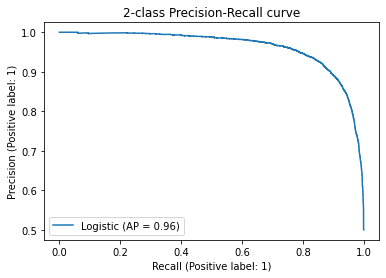

In [22]:
#displaying the trade off between precision and recall
display = PrecisionRecallDisplay.from_estimator(
    clf_e, X_test_tfidf, y_test, name="Logistic"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

#Chosing the best model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

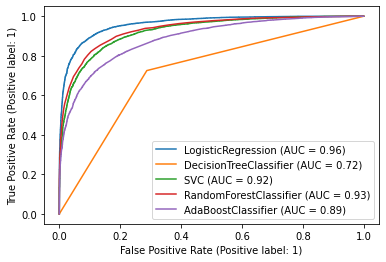

In [23]:
#Plotting roc Curves
disp = plot_roc_curve(clf_e, X_test_tfidf, y_test) 
plot_roc_curve(clf_a, X_test_tfidf, y_test, ax=disp.ax_);
plot_roc_curve(clf_b, X_test_svd, y_test, ax=disp.ax_);
plot_roc_curve(clf_c, X_test_tfidf, y_test, ax=disp.ax_);
plot_roc_curve(clf_d, X_test_tfidf, y_test, ax=disp.ax_);


---